### Evaluation setup
Before we dive into the implementation of the algorithm we should define
the basic logic for making sure that our code works great and usable for
future development.
1. ```random_matrix()```- generates random matrix with specified ```shape```
or ```max_dim``` (used for random generation of dimensions)
2. ```test_corr()``` - asserts correctness of function ```exp_corr_fn```
 according to primary function ```corr_fn```, with ```n_samples``` number of
 rounds

In [50]:
import numpy as np

def random_matrix(max_dim = 200, shape = None):
    if shape is None:
        shape = np.random.randint(25, max_dim), np.random.randint(25, max_dim)
    return np.random.random(shape)

def test_corr(exp_corr_fn, corr_fn, n_samples = 30):
    for i in range(n_samples):
        a = random_matrix()
        b = random_matrix()

        exp_corr = exp_corr_fn(a, b)
        corr = corr_fn(a, b)
        np.testing.assert_array_almost_equal(exp_corr, corr)
        print(f"OK - {i + 1}/{n_samples} (a_shape: {a.shape}, b_shape: {b.shape}")

### Implementation
According to the definition of cross correlation we define the following code.
Some notes:
1. Complexity O($N^2$ * $M^2$), where N, M - dimension of images
2. Memory usage O($(N + M)^2$). Can be reduced to O($OUT^2$) but with
speed computation loss
3. Allows python build-in lists

In [51]:
# Implementation of 2D correlation for two images
def corr2D(a_raw, b_raw):
    a, b = np.array(a_raw), np.array(b_raw)

    # Check for dimensions
    if len(a.shape) != 2:
        raise Exception("Wrong shape for the first matrix")
    if len(b.shape) != 2:
        raise Exception("Wrong shape for the second matrix")

    # Calc output shape
    out_shape = (a.shape[0] + b.shape[0] - 1, a.shape[1] + b.shape[1] - 1)
    out = np.empty(out_shape)

    # Generate extended version of a
    a_ext = np.zeros(
        (a.shape[0] + 2 * (b.shape[0] - 1),
         a.shape[1] + 2 * (b.shape[1] - 1))
    )
    a_ext_shift = b.shape[0] - 1, b.shape[1] - 1
    a_ext[a_ext_shift[0]:(a_ext_shift[0] + a.shape[0]), a_ext_shift[1]:(a_ext_shift[1] + a.shape[1])] = a

    # Make calculations
    for i, j in np.ndindex(out_shape):
        out[i, j] = (a_ext[i:(i + b.shape[0]), j:(j + b.shape[1])] * b).sum()

    return out

### Correctness testing
Let us test our code comparable to correlate2d function
located in ``` scipy.signal ```.

In [52]:
import scipy.signal

test_corr(corr2D, scipy.signal.correlate2d)

OK - 1/30 (a_shape: (104, 117), b_shape: (32, 168)
OK - 2/30 (a_shape: (143, 142), b_shape: (169, 53)
OK - 3/30 (a_shape: (127, 34), b_shape: (116, 112)
OK - 4/30 (a_shape: (55, 176), b_shape: (173, 84)
OK - 5/30 (a_shape: (177, 27), b_shape: (84, 25)
OK - 6/30 (a_shape: (66, 186), b_shape: (70, 38)
OK - 7/30 (a_shape: (169, 78), b_shape: (130, 116)
OK - 8/30 (a_shape: (68, 191), b_shape: (100, 196)
OK - 9/30 (a_shape: (57, 62), b_shape: (162, 168)
OK - 10/30 (a_shape: (38, 178), b_shape: (85, 32)
OK - 11/30 (a_shape: (26, 93), b_shape: (187, 97)
OK - 12/30 (a_shape: (150, 181), b_shape: (143, 169)
OK - 13/30 (a_shape: (146, 51), b_shape: (38, 80)
OK - 14/30 (a_shape: (131, 161), b_shape: (45, 187)
OK - 15/30 (a_shape: (90, 191), b_shape: (71, 187)
OK - 16/30 (a_shape: (34, 150), b_shape: (185, 169)
OK - 17/30 (a_shape: (141, 199), b_shape: (50, 189)
OK - 18/30 (a_shape: (48, 113), b_shape: (167, 140)
OK - 19/30 (a_shape: (154, 186), b_shape: (78, 193)
OK - 20/30 (a_shape: (171, 170), 

### Speed testing
The last evaluation will check the average of runs with
our implementation and scipy function.

In [53]:
a, b = random_matrix(shape=(200, 155)), random_matrix(shape=(120, 115))

%timeit corr2D(a, b)
%timeit scipy.signal.correlate2d(a, b)

1.9 s ± 90.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.11 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Result visualization
Now let's take two images and cross correlate them

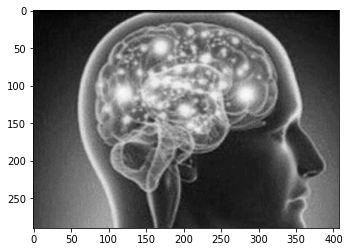

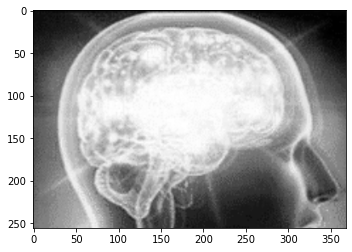

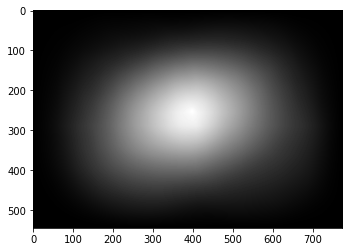

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as img

gray_factor = (0.2989, 0.5870, 0.1140)

def to_gray_scale(rgb):
    return np.dot(rgb[..., :3], gray_factor)

def gray_scale_image(path):
    rgb = img.imread(path)
    gray = to_gray_scale(rgb)
    plt.imshow(gray, cmap=plt.get_cmap('gray'))
    plt.show()
    return gray

a = gray_scale_image('./../data/corr/1.png')
b = gray_scale_image('./../data/corr/2.png')

corr = corr2D(a, b)
plt.imshow(corr, cmap=plt.get_cmap('gray'))

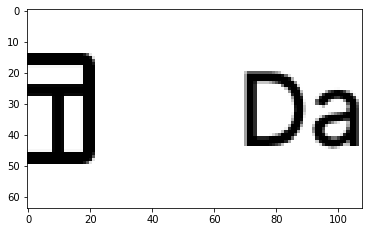

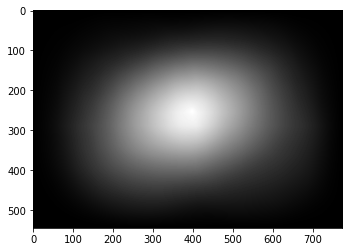

In [55]:
c = gray_scale_image('./../data/corr/3.png')
corrAC = corr2D(a, c)
plt.imshow(corr, cmap=plt.get_cmap('gray'))

In [56]:
def corr2D_image(a, b, result_path):
    res = corr2D(a, b)
    img.imsave(result_path, res)

corr2D_image(a, b, './../data/corr/out/a corr b.png')